In [162]:
import tensorflow as tf
from tensorflow import keras


In [163]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [164]:

df = yf.download('RELIANCE.NS', start='2024-01-01', end='2024-07-15')

print(df)

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-01-01  2580.550049  2606.850098  2573.149902  2590.250000  2590.250000   
2024-01-02  2585.000000  2615.000000  2573.000000  2611.699951  2611.699951   
2024-01-03  2610.000000  2634.000000  2577.199951  2583.300049  2583.300049   
2024-01-04  2588.000000  2609.850098  2579.100098  2596.649902  2596.649902   
2024-01-05  2602.899902  2619.850098  2598.000000  2607.699951  2607.699951   
...                 ...          ...          ...          ...          ...   
2024-07-08  3178.000000  3217.600098  3165.050049  3201.800049  3201.800049   
2024-07-09  3195.199951  3201.000000  3161.000000  3180.550049  3180.550049   
2024-07-10  3190.000000  3195.000000  3126.300049  3168.449951  3168.449951   
2024-07-11  3175.000000  3208.500000  3141.000000  3161.300049  3161.300049   
2024-07-12  3169.000000  3210.300049  3149.000000  3

In [165]:
df.shape

(130, 6)

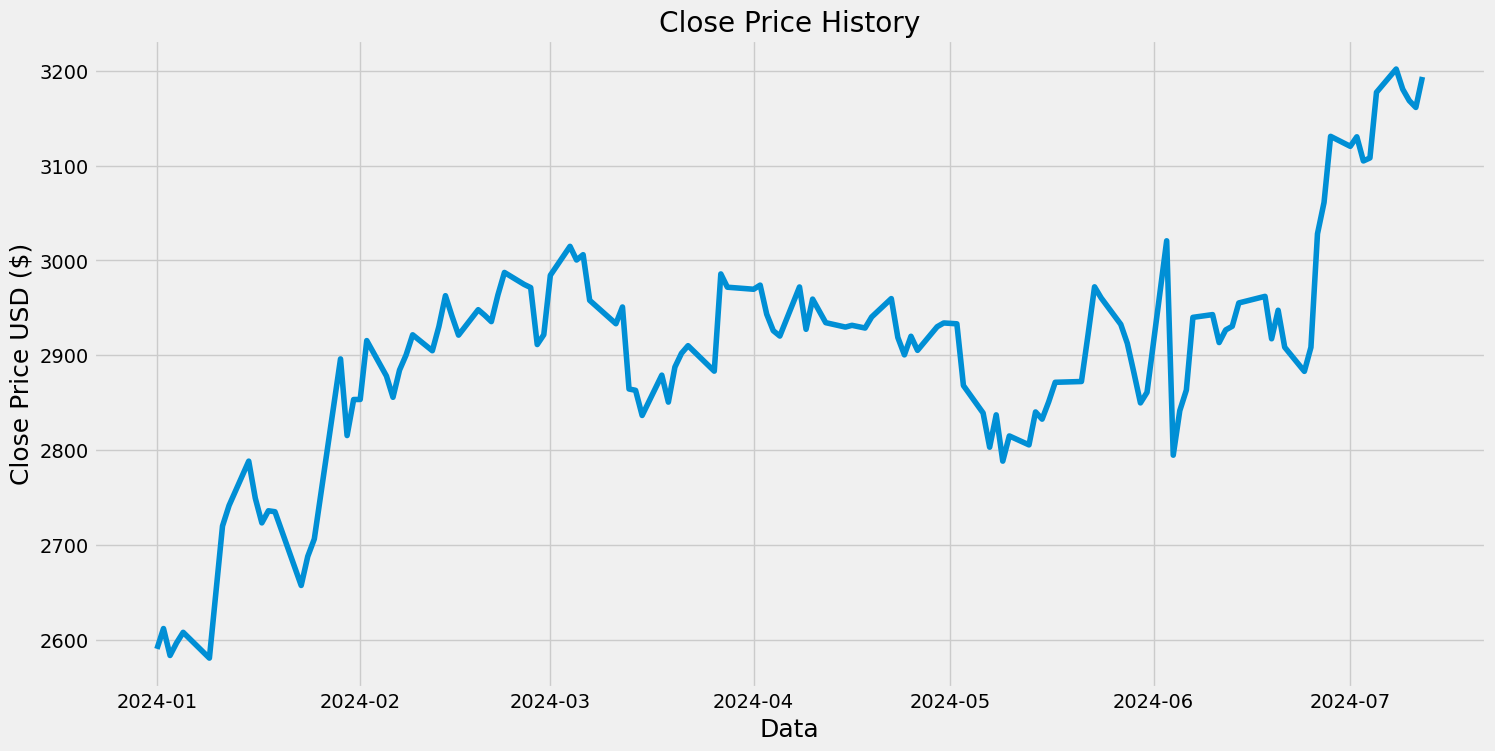

In [166]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [167]:
data= df.filter(['Close'])
dataset= data.values
training_data_len=math.ceil(len(dataset )* .8)
print(training_data_len)

104


In [168]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
print(scaled_data)

[[0.0156929 ]
 [0.0502172 ]
 [0.00450676]
 [0.02599372]
 [0.04377909]
 [0.01102543]
 [0.        ]
 [0.11202333]
 [0.22420737]
 [0.2590535 ]
 [0.3343795 ]
 [0.2716079 ]
 [0.22959905]
 [0.25012054]
 [0.24851101]
 [0.12337019]
 [0.17262191]
 [0.20223707]
 [0.50796728]
 [0.37783676]
 [0.43899884]
 [0.43907939]
 [0.53903086]
 [0.47891522]
 [0.44278139]
 [0.48897477]
 [0.51464667]
 [0.54884914]
 [0.52180899]
 [0.56285196]
 [0.61524219]
 [0.58055677]
 [0.54828565]
 [0.59150164]
 [0.58192503]
 [0.57122143]
 [0.61644933]
 [0.65467563]
 [0.63439542]
 [0.62900373]
 [0.53235148]
 [0.54901025]
 [0.64984704]
 [0.69901821]
 [0.67584077]
 [0.68485428]
 [0.60735565]
 [0.56768055]
 [0.59608896]
 [0.45686476]
 [0.45461118]
 [0.41195869]
 [0.48036364]
 [0.43457264]
 [0.49412518]
 [0.51738279]
 [0.53042012]
 [0.48712358]
 [0.65218078]
 [0.62964739]
 [0.62618706]
 [0.63318827]
 [0.58377583]
 [0.55585075]
 [0.54675668]
 [0.63004977]
 [0.55818449]
 [0.60944773]
 [0.56945118]
 [0.56196664]
 [0.56494443]
 [0.56

In [169]:
train_data= scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.0156929 , 0.0502172 , 0.00450676, 0.02599372, 0.04377909,
       0.01102543, 0.        , 0.11202333, 0.22420737, 0.2590535 ,
       0.3343795 , 0.2716079 , 0.22959905, 0.25012054, 0.24851101,
       0.12337019, 0.17262191, 0.20223707, 0.50796728, 0.37783676,
       0.43899884, 0.43907939, 0.53903086, 0.47891522, 0.44278139,
       0.48897477, 0.51464667, 0.54884914, 0.52180899, 0.56285196,
       0.61524219, 0.58055677, 0.54828565, 0.59150164, 0.58192503,
       0.57122143, 0.61644933, 0.65467563, 0.63439542, 0.62900373,
       0.53235148, 0.54901025, 0.64984704, 0.69901821, 0.67584077,
       0.68485428, 0.60735565, 0.56768055, 0.59608896, 0.45686476,
       0.45461118, 0.41195869, 0.48036364, 0.43457264, 0.49412518,
       0.51738279, 0.53042012, 0.48712358, 0.65218078, 0.62964739])]
[0.6261870565790844]



In [170]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [171]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

x_train.shape

(44, 60, 1)

In [172]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[0],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


c:\Users\Win 10\OneDrive\Desktop\tasks\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [173]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [174]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0740


In [175]:
test_data = scaled_data[training_data_len -60 :, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [176]:
x_test = np.array(x_test)

In [177]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [178]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


In [179]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
print(rmse)

109.04356032151442


C:\Users\Win 10\AppData\Local\Temp\ipykernel_1108\3731662936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


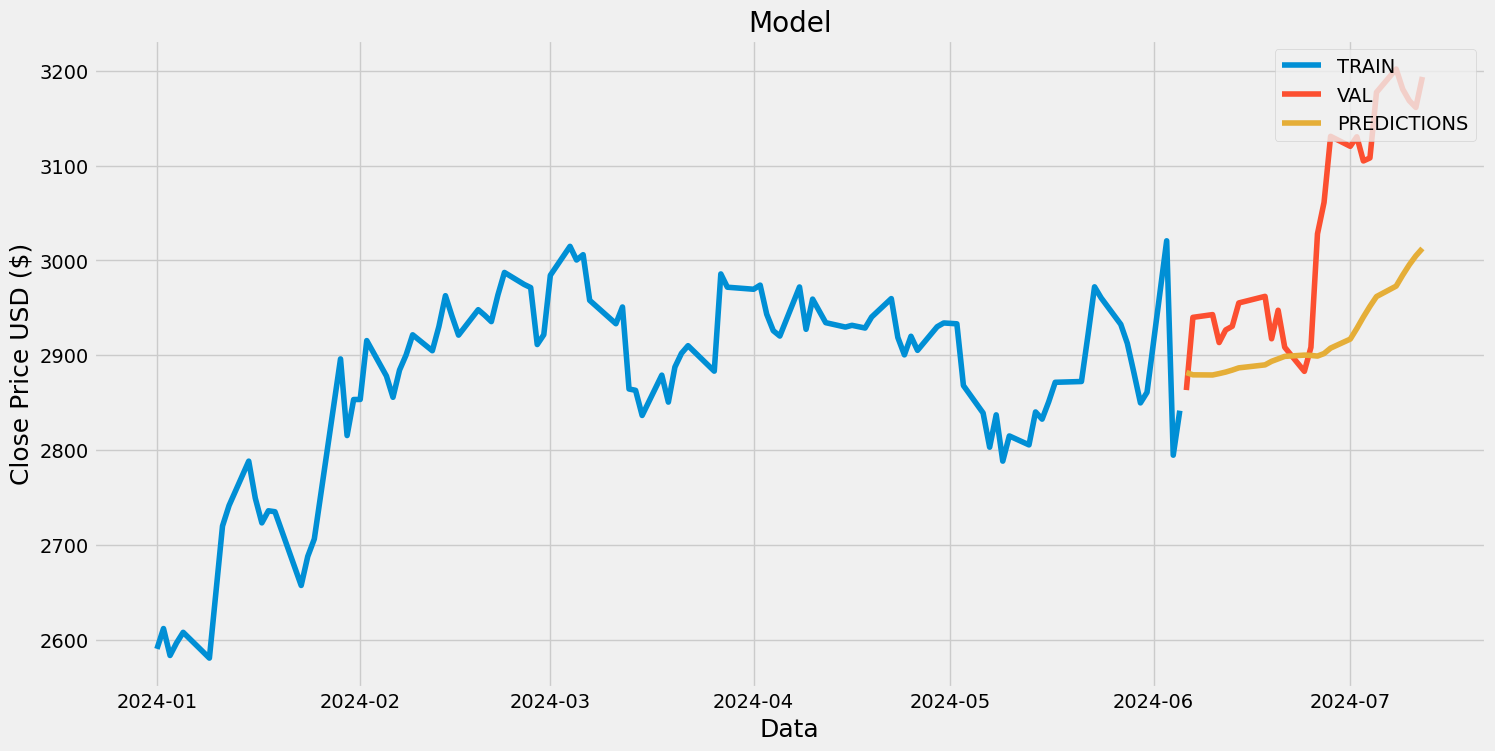

In [180]:
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize= 18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Predictions'])

plt.legend(['TRAIN','VAL','PREDICTIONS'],loc = 'upper right')      
   
plt.show()

In [181]:
print(valid)

                  Close  Predictions
Date                                
2024-06-06  2863.199951  2881.717529
2024-06-07  2939.899902  2879.285156
2024-06-10  2942.800049  2879.128906
2024-06-11  2913.350098  2880.590088
2024-06-12  2926.649902  2882.215576
2024-06-13  2930.500000  2884.282227
2024-06-14  2955.100098  2886.637695
2024-06-18  2962.050049  2889.794434
2024-06-19  2917.300049  2893.523926
2024-06-20  2947.399902  2896.120361
2024-06-21  2908.399902  2898.746826
2024-06-24  2882.949951  2900.076416
2024-06-25  2908.300049  2899.741699
2024-06-26  3028.050049  2899.069824
2024-06-27  3061.100098  2901.744141
2024-06-28  3130.800049  2907.456299
2024-07-01  3120.300049  2916.978760
2024-07-02  3130.350098  2928.203369
2024-07-03  3104.850098  2940.291504
2024-07-04  3108.050049  2951.562500
2024-07-05  3177.250000  2961.822754
2024-07-08  3201.800049  2972.877930
2024-07-09  3180.550049  2984.517578
2024-07-10  3168.449951  2995.332031
2024-07-11  3161.300049  3004.753906
2

In [184]:
quote = yf.download('RELIANCE.NS',start = '2019-01-01', end= '2024-07-15')
new_df = quote.filter(['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled = scaler_transform=(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
[[3487.942]]


In [185]:
quote2 = yf.download('RELIANCE.NS',start= '2019-01-01', end='2024-07-15')
print(quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2019-01-01    1024.966919
2019-01-02    1011.617737
2019-01-03     999.137085
2019-01-04    1004.531616
2019-01-07    1010.109070
                 ...     
2024-07-08    3201.800049
2024-07-09    3180.550049
2024-07-10    3168.449951
2024-07-11    3161.300049
2024-07-12    3193.449951
Name: Close, Length: 1365, dtype: float64
